In [39]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('ExportedDatasetsNew/cyberbullying.csv')

In [41]:
df.sample(5)

,tweet_text,cyberbullying_type
47002,nope can't deny that sweet face or lil schnau...,1
79578,RT @benpobjie: “We see a future for ourselves ...,0
45614,I don't know the full situation but daily remi...,1
6996,@talisasofie Feminists think hating men is fem...,1
66362,umm brian mcfaddern jokes umm umm umm i dont...,0


In [42]:
df.shape

(81417, 2)

### Chapters
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Text preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website

## 1. Data Cleaning

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81417 entries, 0 to 81416
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81417 non-null  object
 1   cyberbullying_type  81417 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [44]:
# Reorder columns
df = df.iloc[:,[1,0]]

# Rename the columns
df.rename(columns={'cyberbullying_type':'target', 'tweet_text':'text'}, inplace=True)
df.sample(5)

,target,text
70784,0,HAHA...emo lawn. I dig that!
48626,1,get them all out of the dome ....NOW damn it...
7414,1,"Hopefully this will begin to die down soon, in..."
1986,0,Everyone's face at the table on hearing Kat's ...
41736,1,Black Mob Swarms Georgia Walmart to See 'How M...


In [45]:
 # Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [46]:
# Check for duplicates
df.duplicated().sum()

11309

In [47]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [48]:
df.duplicated().sum()

0

In [49]:
df.shape

(70108, 2)

## 2. ΕΒΑ

In [50]:
df.head()

,target,text
0,0,"In other words #katandandre, your food was cra..."
1,0,Why is #aussietv so white? #MKR #theblock #ImA...
2,0,@XochitlSuckkks a classy whore? Or more red ve...
3,0,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,0,@RudhoeEnglish This is an ISIS account pretend...


In [51]:
df['target'].value_counts()

1    42974
0    27134
Name: target, dtype: int64

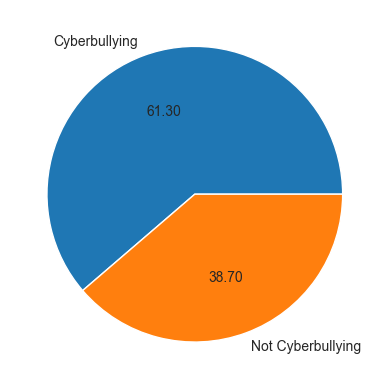

In [52]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Cyberbullying','Not Cyberbullying'], autopct="%0.2f")
plt.show()

In [53]:
# Data is imbalanced

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
# Number of Characters
df['num_characters'] = df['text'].apply(len)

In [57]:
df.head()

,target,text,num_characters
0,0,"In other words #katandandre, your food was cra...",61
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103
4,0,@RudhoeEnglish This is an ISIS account pretend...,103


In [58]:
# Number of Words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
df.head()

,target,text,num_characters,num_words
0,0,"In other words #katandandre, your food was cra...",61,13
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22


In [60]:
# Number of Sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"In other words #katandandre, your food was cra...",61,13,2
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25,2
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12,2
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23,2
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22,2


In [62]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,70108.000000,70108.000000,70108.000000
mean,120.999686,25.863183,2.016075
std,78.354913,16.467944,1.295009
min,3.000000,1.000000,1.000000
25%,68.000000,15.000000,1.000000
50%,111.000000,23.000000,2.000000
75%,140.000000,31.000000,3.000000
max,5018.000000,1021.000000,66.000000


In [63]:
#Describe function for Not Cyberbullying

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,27134.000000,27134.000000,27134.000000
mean,82.553549,18.368468,1.867546
std,47.505510,10.342461,1.050102
min,3.000000,1.000000,1.000000
25%,48.000000,11.000000,1.000000
50%,79.000000,18.000000,2.000000
75%,116.000000,25.000000,2.000000
max,1809.000000,374.000000,19.000000


In [64]:
#Describe function for Cyberbullying

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,42974.000000,42974.000000,42974.000000
mean,145.274771,30.595383,2.109857
std,84.074798,17.805338,1.420210
min,5.000000,1.000000,1.000000
25%,90.000000,19.000000,1.000000
50%,131.000000,27.000000,2.000000
75%,200.000000,41.000000,3.000000
max,5018.000000,1021.000000,66.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

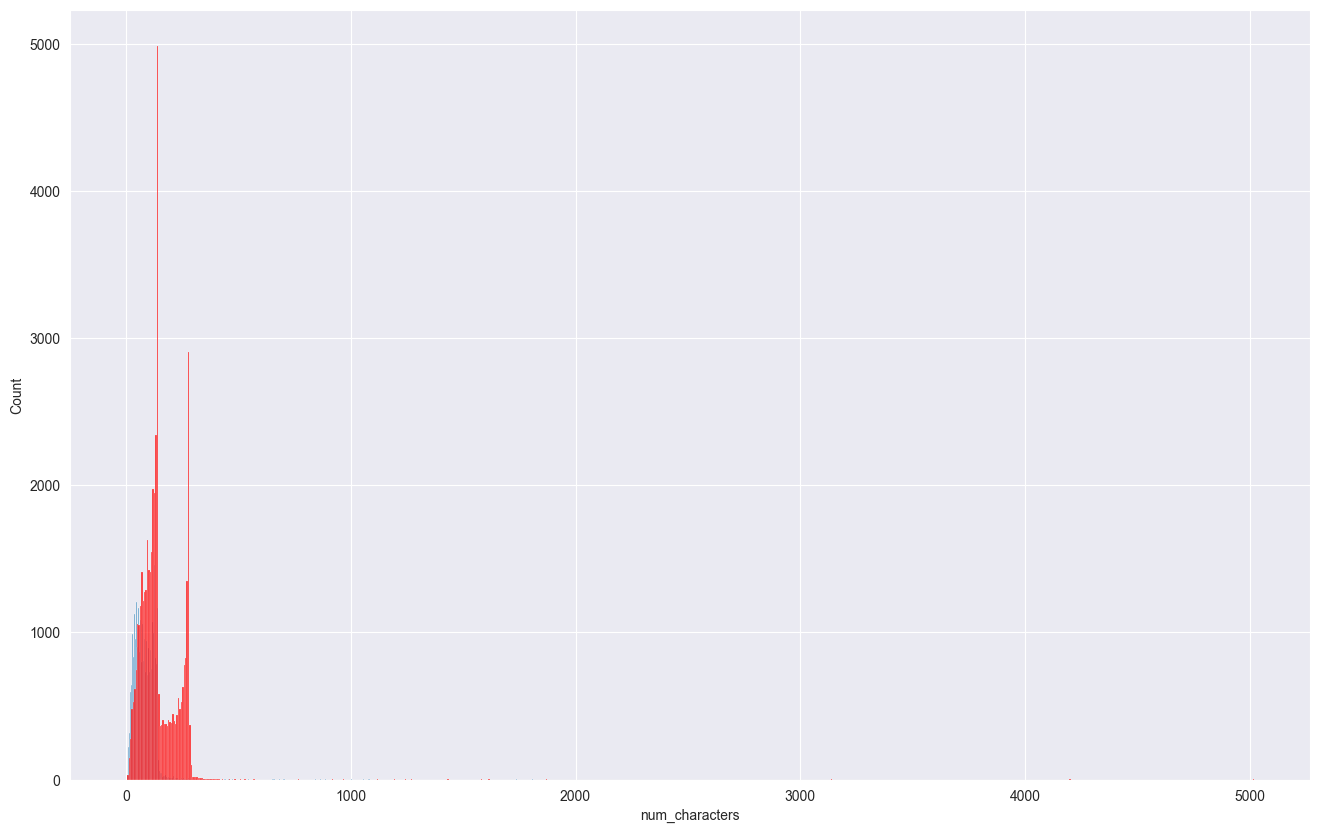

In [65]:
import  seaborn as sns

plt.figure(figsize=(16,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

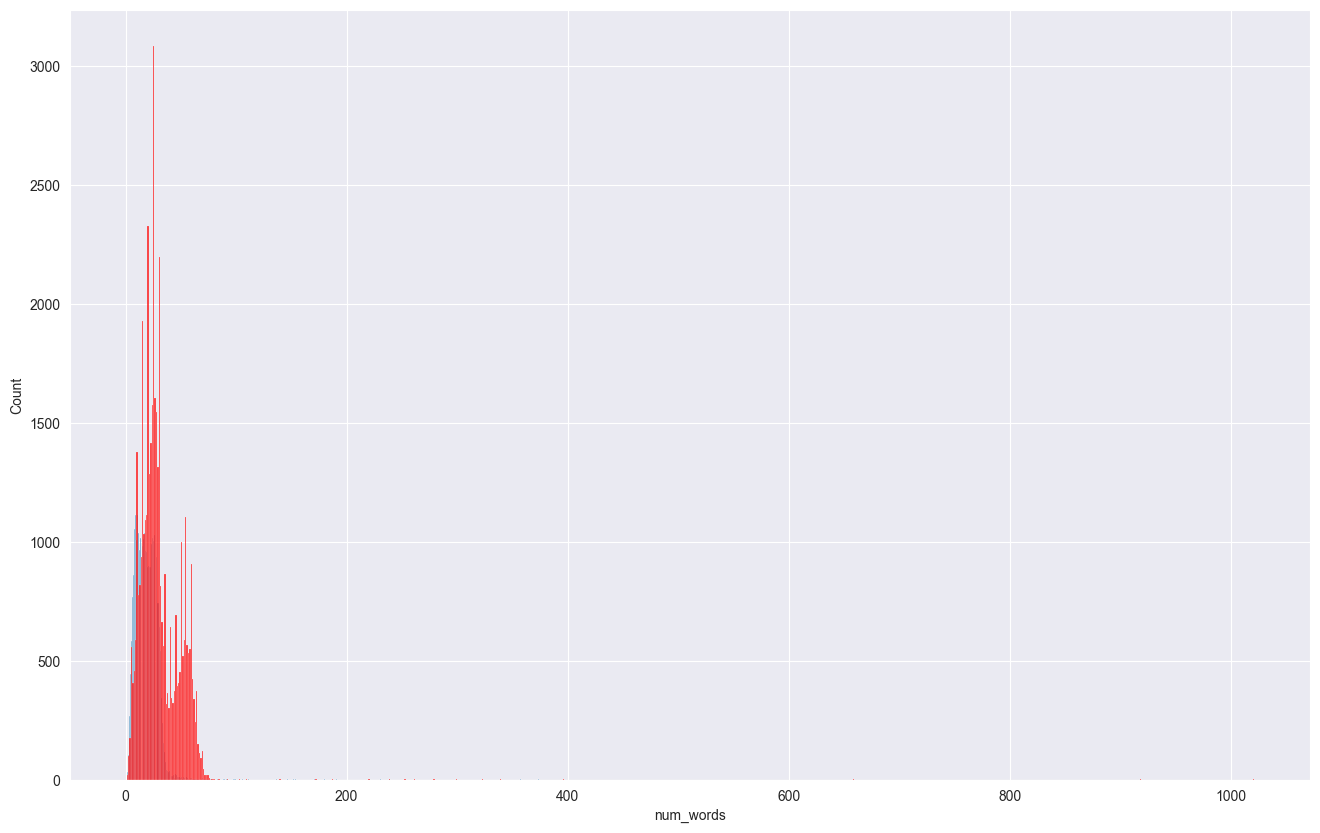

In [66]:
plt.figure(figsize=(16,10))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

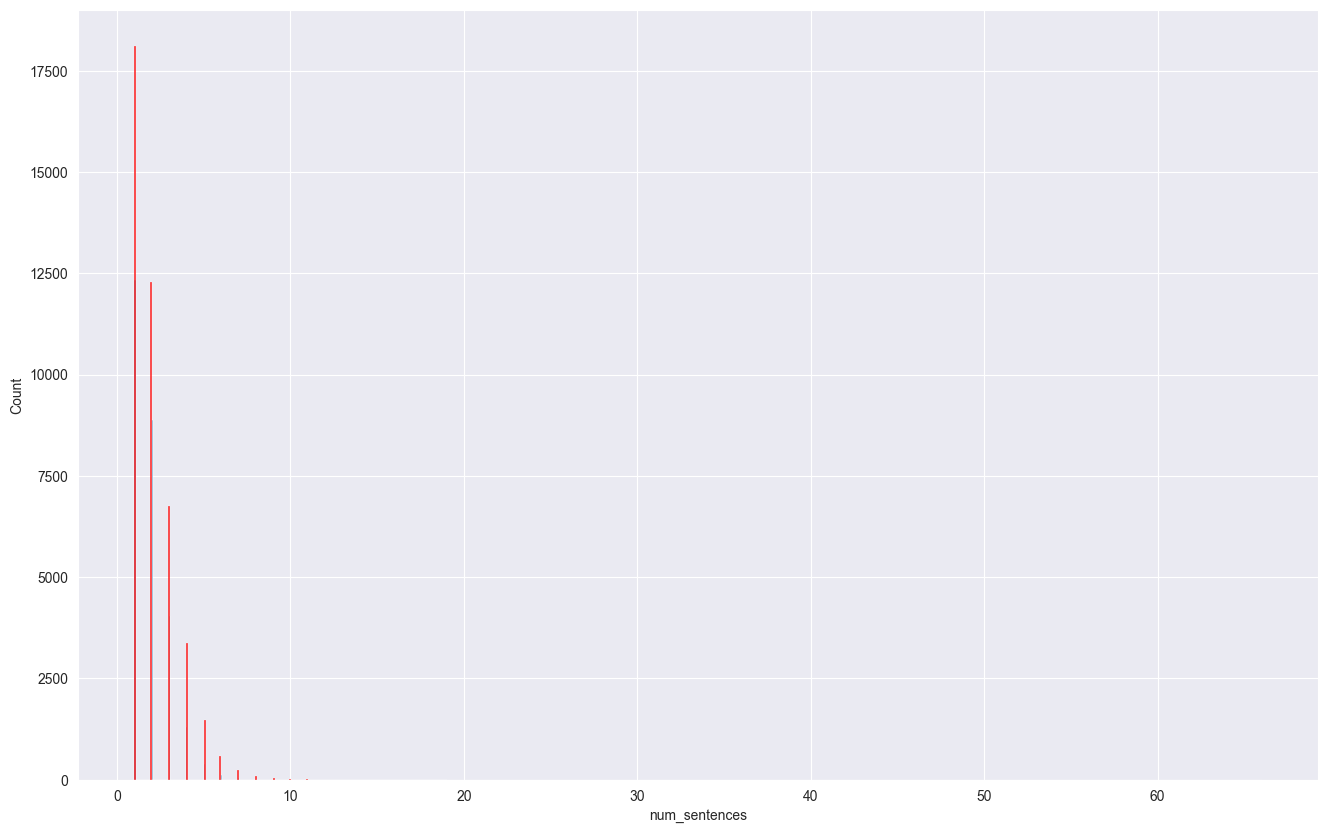

In [67]:
plt.figure(figsize=(16,10))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

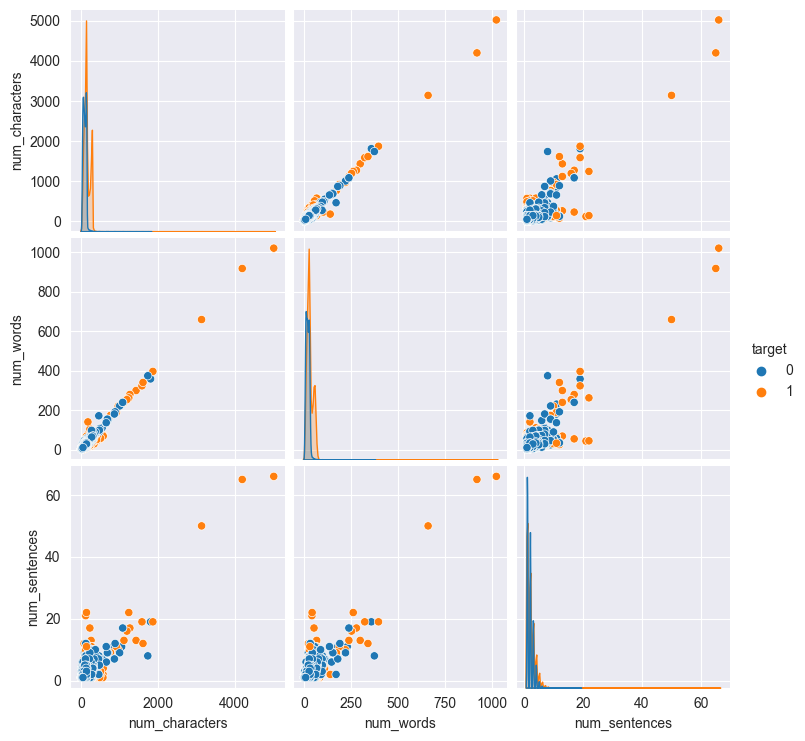

In [68]:
sns.pairplot(df,hue='target')

In [69]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.389891,0.361637,0.091137
num_characters,0.389891,1.000000,0.973176,0.523793
num_words,0.361637,0.973176,1.000000,0.581482
num_sentences,0.091137,0.523793,0.581482,1.000000


<AxesSubplot: >

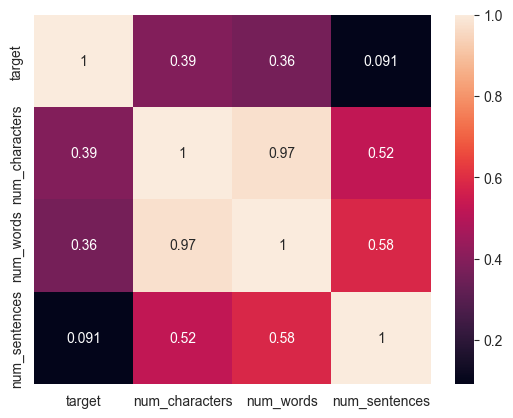

In [70]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing

   - Lower case
   - Tokenization
   - Remove special characters
   - Removing stop words and punctuation
   - Stemming

In [71]:
def clean_text(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # Remove emojis
    tweet = re.sub(r':[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [72]:
df['clean_text'] = df['text'].apply(clean_text)
df.head(30)

,target,text,num_characters,num_words,num_sentences,clean_text
0,0,"In other words #katandandre, your food was cra...",61,13,2,In other words your food was crapilicious
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25,2,Why is so white
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12,2,a classy whore Or more red velvet cupcakes
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23,2,meh thanks for the heads up but not too conce...
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22,2,This is an ISIS account pretending to be a Kur...
5,0,"@Raja5aab @Quickieleaks Yes, the test of god i...",131,28,1,Yes the test of god is that good or bad or ind...
6,0,Karma. I hope it bites Kat on the butt. She is...,63,18,4,Karma I hope it bites Kat on the butt She is j...
7,0,@stockputout everything but mostly my priest,44,7,1,everything but mostly my priest
8,0,Rebecca Black Drops Out of School Due to Bully...,50,10,1,Rebecca Black Drops Out of School Due to Bullying
9,0,@Jord_Is_Dead http://t.co/UsQInYW5Gn,36,5,1,


In [73]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
            y.append(ps.stem(i))

    return " ".join(y)

In [74]:
from  nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
import  string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('johnie')

'johni'

In [79]:
df['transform_text'] = df['clean_text'].apply(transform_text)

In [80]:
df.to_csv("ExportedDatasetsNew/cyberbullyingNewCampusX.csv", index=False)

In [81]:
df.isnull().sum()

target            0
text              0
num_characters    0
num_words         0
num_sentences     0
clean_text        0
transform_text    0
dtype: int64

In [83]:
df.head()

,target,text,num_characters,num_words,num_sentences,clean_text,transform_text
0,0,"In other words #katandandre, your food was cra...",61,13,2,In other words your food was crapilicious,word food crapilici
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25,2,Why is so white,white
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12,2,a classy whore Or more red velvet cupcakes,classi whore red velvet cupcak
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23,2,meh thanks for the heads up but not too conce...,meh thank head concern anoth angri dude twitter
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22,2,This is an ISIS account pretending to be a Kur...,isi account pretend kurdish account like islam...


In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [85]:
cyber_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

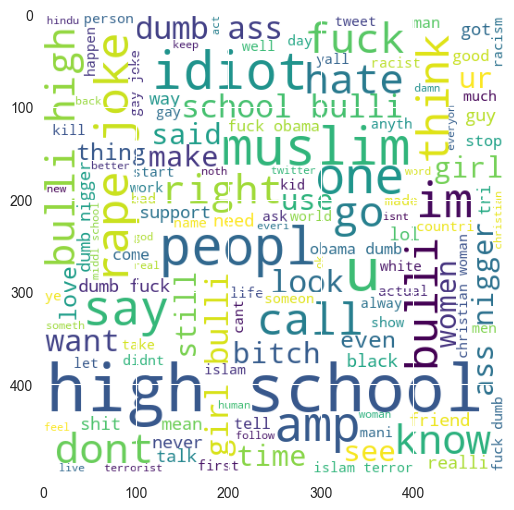

In [86]:
plt.figure(figsize=(12,6))
plt.imshow(cyber_wc)

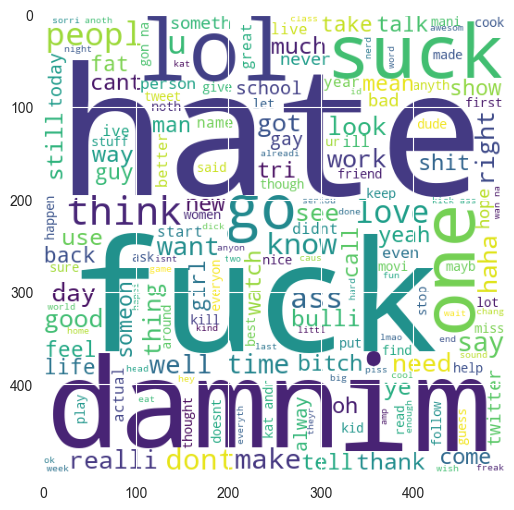

In [87]:
not_cyber_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(not_cyber_wc)

In [88]:
df.head()

,target,text,num_characters,num_words,num_sentences,clean_text,transform_text
0,0,"In other words #katandandre, your food was cra...",61,13,2,In other words your food was crapilicious,word food crapilici
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25,2,Why is so white,white
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12,2,a classy whore Or more red velvet cupcakes,classi whore red velvet cupcak
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23,2,meh thanks for the heads up but not too conce...,meh thank head concern anoth angri dude twitter
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22,2,This is an ISIS account pretending to be a Kur...,isi account pretend kurdish account like islam...


In [89]:
cyber_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        cyber_corpus.append(word)

In [90]:
len(cyber_corpus)

589243

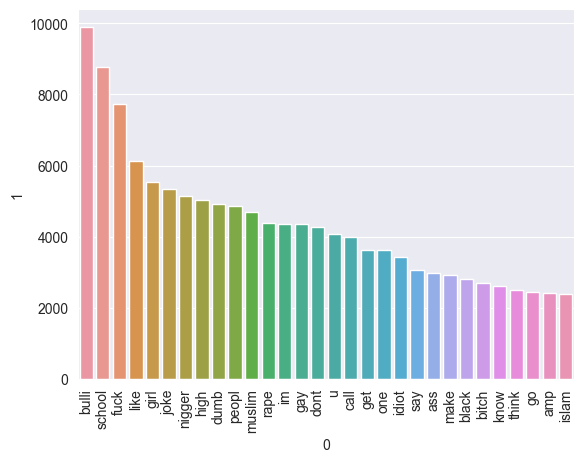

In [91]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(cyber_corpus).most_common(30))[0],y=pd.DataFrame(Counter(cyber_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
not_cyber_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        not_cyber_corpus.append(word)

In [93]:
len(not_cyber_corpus)

208154

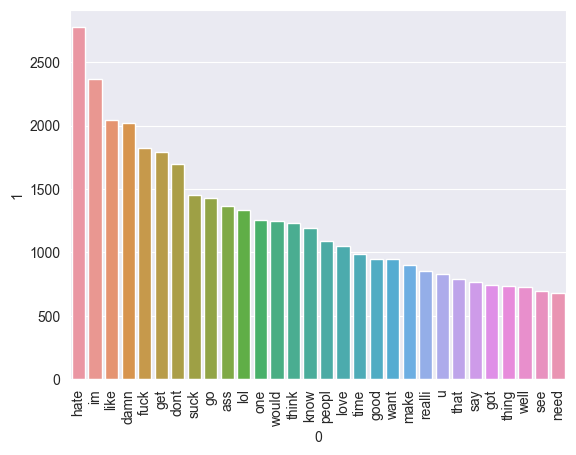

In [94]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(not_cyber_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_cyber_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,clean_text,transform_text
0,0,"In other words #katandandre, your food was cra...",61,13,2,In other words your food was crapilicious,word food crapilici
1,0,Why is #aussietv so white? #MKR #theblock #ImA...,115,25,2,Why is so white,white
2,0,@XochitlSuckkks a classy whore? Or more red ve...,60,12,2,a classy whore Or more red velvet cupcakes,classi whore red velvet cupcak
3,0,"@Jason_Gio meh. :P thanks for the heads up, b...",103,23,2,meh thanks for the heads up but not too conce...,meh thank head concern anoth angri dude twitter
4,0,@RudhoeEnglish This is an ISIS account pretend...,103,22,2,This is an ISIS account pretending to be a Kur...,isi account pretend kurdish account like islam...


## 4. Model Building

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['transform_text'],df['target'],test_size=0.2,random_state=42)

In [158]:
X_train.shape

(56086,)

In [159]:
X_test.shape

(14022,)

In [160]:
y_train.shape

(56086,)

In [161]:
y_test.shape

(14022,)

In [162]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# cv = CountVectorizer()
# X_train = cv.fit_transform(X_train)
# X_test = cv.transform(X_test)

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [163]:
print(X_train)

  (0, 6104)	0.14458637204981983
  (0, 19454)	0.16453533655075878
  (0, 16558)	0.2060941276950536
  (0, 30780)	0.14664152638668887
  (0, 26042)	0.1317956644022155
  (0, 18868)	0.14967605268085518
  (0, 17656)	0.16668297135068333
  (0, 28177)	0.247265886241073
  (0, 4593)	0.08576281224095551
  (0, 941)	0.10835462842815986
  (0, 25739)	0.38003536616135664
  (0, 1017)	0.18308722807065256
  (0, 26303)	0.247265886241073
  (0, 20551)	0.12717801620676755
  (0, 25709)	0.2271113521582432
  (0, 12460)	0.247265886241073
  (0, 7041)	0.16121786867087626
  (0, 9220)	0.247265886241073
  (0, 18372)	0.247265886241073
  (0, 5592)	0.15429335927114762
  (0, 20497)	0.15684398790294352
  (0, 3942)	0.2060941276950536
  (0, 6197)	0.247265886241073
  (0, 27577)	0.17690855954887125
  (0, 27397)	0.15630965105622555
  :	:
  (56082, 30380)	0.19839463194765736
  (56083, 11610)	0.6919896409806019
  (56083, 11968)	0.5117064581530851
  (56083, 2895)	0.5092217959396109
  (56084, 33040)	0.7275928138442892
  (56084, 17888

In [164]:
print(X_test)

  (0, 33772)	0.25580797013462875
  (0, 30298)	0.3173386435456411
  (0, 27028)	0.2811015474363751
  (0, 24896)	0.49675679128521827
  (0, 17376)	0.2793840784056556
  (0, 14429)	0.18912845097614653
  (0, 11616)	0.5190269307905581
  (0, 3512)	0.3533540560797654
  (1, 33957)	0.36090361592713305
  (1, 33535)	0.39682213456579163
  (1, 32513)	0.2752335069845616
  (1, 30480)	0.20747610397340707
  (1, 29153)	0.16813353741464424
  (1, 28849)	0.16950923264774362
  (1, 25257)	0.2794366508523562
  (1, 22335)	0.33120689552816523
  (1, 20044)	0.21611892511837624
  (1, 19035)	0.2655916564905388
  (1, 15303)	0.18471595450669723
  (1, 9541)	0.18718136053283124
  (1, 2999)	0.3460552557276491
  (1, 1703)	0.20624848414548008
  (2, 25353)	0.23322454887456712
  (2, 20623)	0.6300450385122898
  (2, 17165)	0.3675761173490847
  :	:
  (14019, 12735)	0.31873313055878066
  (14019, 12135)	0.109860775400852
  (14019, 11812)	0.45066855340698486
  (14019, 11211)	0.1611247356718948
  (14019, 9541)	0.12825713801019703
  (

In [165]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

mnb = MultinomialNB()
bnb = BernoulliNB()

In [166]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.7486806447011839
0.7392315564238534
[[2552 2803]
 [ 721 7946]]


In [167]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.8038796177435459
0.8974875722155045
[[4592  763]
 [1987 6680]]


In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [169]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [170]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [171]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [172]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8232063899586364, 0.8884007029876977)

In [173]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8232063899586364
Precision -  0.8884007029876977
For  KN
Accuracy -  0.6956924832406218
Precision -  0.7057613168724279
For  NB
Accuracy -  0.7486806447011839
Precision -  0.7392315564238534
For  DT
Accuracy -  0.7032520325203252
Precision -  0.9575548334687246
For  LR
Accuracy -  0.8188560832976751
Precision -  0.8902050694179086
For  RF
Accuracy -  0.7852660105548424
Precision -  0.8406408094435076
For  AdaBoost
Accuracy -  0.8054485808015975
Precision -  0.901338018651169
For  BgC
Accuracy -  0.7807730708886036
Precision -  0.840082694880214
For  ETC
Accuracy -  0.7838396805020682
Precision -  0.8300538767861326
For  GBDT
Accuracy -  0.7986735130509199
Precision -  0.9332740213523132
For  xgb
Accuracy -  0.8175010697475396
Precision -  0.9294150731158605


In [201]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [202]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.823206,0.888401
4,LR,0.818856,0.890205
10,xgb,0.817501,0.929415
6,AdaBoost,0.805449,0.901338
9,GBDT,0.798674,0.933274
5,RF,0.785266,0.840641
8,ETC,0.783840,0.830054
7,BgC,0.780773,0.840083
2,NB,0.748681,0.739232
3,DT,0.703252,0.957555


In [203]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [204]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.823206
1,LR,Accuracy,0.818856
2,xgb,Accuracy,0.817501
3,AdaBoost,Accuracy,0.805449
4,GBDT,Accuracy,0.798674
5,RF,Accuracy,0.785266
6,ETC,Accuracy,0.783840
7,BgC,Accuracy,0.780773
8,NB,Accuracy,0.748681
9,DT,Accuracy,0.703252


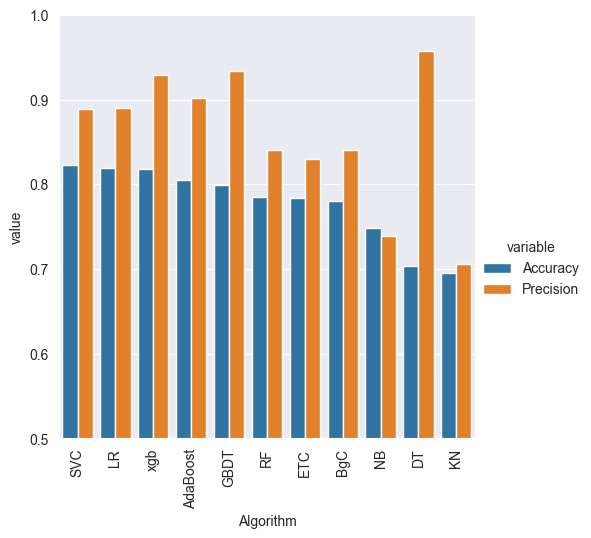

In [205]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [206]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))